1. data cleaning
2. EDA- multi variate analysis
3. insights

In [28]:
import pandas as pd
dataset = pd.read_csv('oasis_longitudinal.csv')
dataset.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [29]:
# To find features having null values.
dataset.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [30]:
# To see numerical columns summary
import numpy as np
dataset.describe(include=[np.number])

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [31]:
# To see categorical columns summary
dataset.describe(include=[np.object])

,Subject ID,MRI ID,Group,M/F,Hand
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0127,OAS2_0161_MR2,Nondemented,F,R
freq,5,1,190,213,373


In [32]:
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']
for feature in numerical_with_nan:
    print("{}: {}% missing values".format(feature, np.around(dataset[feature].isnull().mean(),4)))

SES: 0.0509% missing values
MMSE: 0.0054% missing values


In [33]:
dataset = dataset.drop(['Subject ID', 'MRI ID', 'Hand'], axis=1) #id have no relation and hand has only one value R

In [34]:
dataset.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


count    354.000000
mean       2.460452
std        1.134005
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

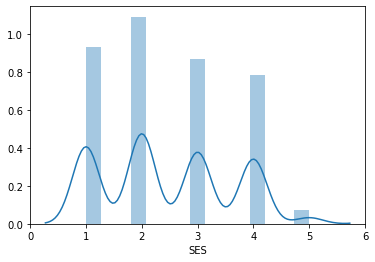

In [35]:
#handling missing values
import seaborn as sns
sns.distplot(dataset['SES'])
dataset['SES'].describe()

count    371.000000
mean      27.342318
std        3.683244
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

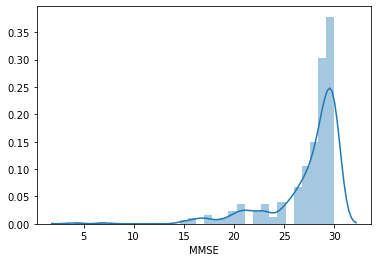

In [36]:
sns.distplot(dataset['MMSE'])
dataset['MMSE'].describe()

In [37]:
dataset['SES'].fillna(dataset['SES'].median(), inplace=True)
dataset['MMSE'].fillna(dataset['MMSE'].median(), inplace=True)

In [38]:
dataset.isnull().sum()

Group       0
Visit       0
MR Delay    0
M/F         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

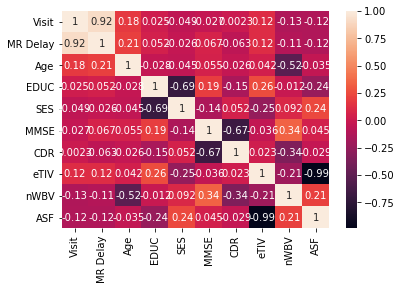

In [39]:
sns.heatmap(dataset.corr(),annot=True, fmt='.2g')

In [40]:
dataset =dataset.drop(['MR Delay'],axis=1) # since highly correlated with visit

In [41]:
#for now CDR not zero then dementia(1) else non dementia(0)
def cat_CDR(data):
    if data==0:
        return 0
    else :
        return 1
dataset['CDR'] = dataset['CDR'].apply(lambda x : cat_CDR(x)) 

In [42]:
#dataset.loc[dataset['Group']=='Converted']
dataset.head()

,Group,Visit,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,M,87,14,2.0,27.0,0,1987,0.696,0.883
1,Nondemented,2,M,88,14,2.0,30.0,0,2004,0.681,0.876
2,Demented,1,M,75,12,2.0,23.0,1,1678,0.736,1.046
3,Demented,2,M,76,12,2.0,28.0,1,1738,0.713,1.010
4,Demented,3,M,80,12,2.0,22.0,1,1698,0.701,1.034


In [43]:
dataset['Gender'] = dataset['M/F'].map({'F':0, 'M':1})
dataset = dataset.drop(['M/F','Group'], axis=1)
dataset.head()


,Visit,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender
0,1,87,14,2.0,27.0,0,1987,0.696,0.883,1
1,2,88,14,2.0,30.0,0,2004,0.681,0.876,1
2,1,75,12,2.0,23.0,1,1678,0.736,1.046,1
3,2,76,12,2.0,28.0,1,1738,0.713,1.010,1
4,3,80,12,2.0,22.0,1,1698,0.701,1.034,1


In [44]:
from sklearn.model_selection import train_test_split
y = dataset['CDR']
X = dataset.drop(['CDR'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(261, 9), y:(261,)
Shape test set: X:(112, 9), y:(112,)


In [46]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score
model = ensemble.RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))


Accuracy : 0.8303571428571429
